### Test Notebook
To take a test, please clone the relevant branch and send us back a repo with a completed notebook! 

Geospatial Python Test  
Please analyze and visualize Active Major Construction permits in New York City in a jupyter notebook (New Building or Major Alteration A1). The data can be downloaded here.   


At a minimum:   

Create a summary table with key metrics     
Visually explore key metrics, including at least one time series graph  
Perform a spatial join against another layer of your choice (e.g. Census layers, transit walksheds, etc.)   
Create a summary table making use of the joined data points 
Export your final data to excel and shapefile   
Optionally, include some extra analysis or functionalities of your choice. A few ideas: 

Turn your analysis into an executable script for processing new permit data from the same source, exporting key data points and charts  
Perform a statistical test on the data (e.g. linear regression, clustering) and characterize results    
Scale/normalize key metrics and create a composite indicator of development activity    
Identify existing parcel land uses and buildings to understand how the build landscape is changing  
Please do not spend more than two hours on this test. We do not want you to go overboard! The objective of this test is to get a flavor for your coding style and analytical approach. We will run the notebook in order so make sure you don't have any bugs!  

None of your code will be used by WXY for project work. 

### By: Sharvari Deshpande

## Importing Libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading Data

Data Source: https://data.cityofnewyork.us/Housing-Development/DOB-Permit-Issuance/ipu4-2q9a

DOB Permit Issuance for NYC

In [2]:
data = pd.read_csv('/Users/Sharvari/Downloads/WXY/DOB_Permit_Issuance.csv') 

In [3]:
data.head()

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,MANHATTAN,1088749,1,MADISON AVE,141008987,1,A3,Y,853.0,2.0,...,NaN,NaN,2125942700.0,05/11/2022 00:00:00,3905851,40.740909,-73.987947,2.0,56.0,Hudson Yards-Chelsea-Flatiron-Union Square
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,1,A2,Y,5687.0,66.0,...,NaN,NaN,9174201655.0,05/11/2022 00:00:00,3905852,40.563654,-74.179584,51.0,17008.0,Arden Heights
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,1,A2,Y,64.0,22.0,...,NaN,NaN,7188125847.0,05/11/2022 00:00:00,3905853,40.639633,-74.094169,49.0,81.0,West New Brighton-New Brighton-St. George
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,1,A2,Y,5260.0,1.0,...,NaN,NaN,3478575846.0,05/11/2022 00:00:00,3905854,40.544597,-74.157153,51.0,15601.0,Great Kills
4,STATEN ISLAND,5058036,273,10 STREET,540218628,1,A2,Y,4242.0,45.0,...,NaN,NaN,7186195891.0,05/11/2022 00:00:00,3905855,40.566798,-74.119726,50.0,134.0,New Dorp-Midland Beach


In [4]:
data.dtypes

BOROUGH                              object
Bin #                                 int64
House #                              object
Street Name                          object
Job #                                 int64
Job doc. #                            int64
Job Type                             object
Self_Cert                            object
Block                                object
Lot                                  object
Community Board                      object
Zip Code                            float64
Bldg Type                           float64
Residential                          object
Special District 1                   object
Special District 2                   object
Work Type                            object
Permit Status                        object
Filing Status                        object
Permit Type                          object
Permit Sequence #                     int64
Permit Subtype                       object
Oil Gas                         

In [5]:
data.describe()

,Bin #,Job #,Job doc. #,Zip Code,Bldg Type,Permit Sequence #,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT
count,3.950645e+06,3.950645e+06,3.950645e+06,3.949441e+06,3.893256e+06,3.950645e+06,3.950645e+06,3.939132e+06,3.939132e+06,3.939132e+06,3.939132e+06
mean,2.555158e+06,2.549448e+08,1.120014e+00,1.064585e+04,1.752934e+00,1.572190e+00,1.982936e+06,4.072475e+01,-7.394509e+01,2.035154e+01,6.416141e+03
std,1.436104e+06,1.351996e+08,4.240710e-01,5.999304e+02,4.313053e-01,1.323030e+00,1.141093e+06,7.326601e-02,8.486549e-02,1.634853e+01,2.131421e+04
min,3.084860e+05,1.000300e+08,1.000000e+00,1.000000e+04,1.000000e+00,1.000000e+00,1.000000e+01,4.049881e+01,-7.425490e+01,1.000000e+00,1.000000e+00
25%,1.046830e+06,1.208022e+08,1.000000e+00,1.002300e+04,2.000000e+00,1.000000e+00,9.955120e+05,4.068274e+01,-7.398854e+01,4.000000e+00,9.700000e+01
50%,3.001779e+06,3.001817e+08,1.000000e+00,1.045900e+04,2.000000e+00,1.000000e+00,1.983276e+06,4.073576e+01,-7.396115e+01,1.900000e+01,2.200000e+02
75%,4.018297e+06,4.005952e+08,1.000000e+00,1.122600e+04,2.000000e+00,2.000000e+00,2.970977e+06,4.076596e+01,-7.390345e+01,3.400000e+01,7.380000e+02
max,5.869568e+06,5.660018e+08,1.200000e+01,9.121700e+04,2.000000e+00,3.500000e+01,3.960240e+06,4.091371e+01,-7.370038e+01,5.100000e+01,1.579030e+05


In [6]:
data.isnull().sum()

BOROUGH                                   0
Bin #                                     0
House #                                   4
Street Name                               4
Job #                                     0
Job doc. #                                0
Job Type                                  0
Self_Cert                           1336012
Block                                   495
Lot                                     504
Community Board                        1612
Zip Code                               1204
Bldg Type                             57389
Residential                         2345325
Special District 1                  3497919
Special District 2                  3950052
Work Type                            710611
Permit Status                         11200
Filing Status                             0
Permit Type                               1
Permit Sequence #                         0
Permit Subtype                      1563700
Oil Gas                         

## Data Preparation and Cleaning

In [7]:
# Columns to drop
cols_to_drop = [
    'Job #',
    'Job doc. #', 
    'Self_Cert',
    'Permittee\'s First Name', 
    'Permittee\'s Last Name', 
    'Permittee\'s Business Name', 
    'Permittee\'s Phone #', 
    'Permittee\'s License Type', 
    'Permittee\'s License #',
    "Site Safety Mgr's First Name",
    "Site Safety Mgr's Last Name",
    "Site Safety Mgr Business Name",
    "Superintendent First & Last Name",
    "Superintendent Business Name",
    'Owner\'s Business Type',
    'Owner\'s Business Name',
    'Owner\'s First Name',
    'Owner\'s Last Name',
    'Owner\'s Phone #',
    'Owner\'s House #',
    'Owner\'s House Street Name',
    'Owner’s House City',
    'Owner’s House State',
    'Owner’s House Zip Code',
    'HIC License', 
    'Oil Gas', 
    'Permit Subtype', 
    "Permittee's Other Title", 
    'Site Fill', 
    'Non-Profit',
    "Residential",
    "Special District 1",
    'Special District 2',
    'PERMIT_SI_NO',
    'Act as Superintendent'
]
# Drop the columns
data.drop(cols_to_drop, axis=1, inplace=True)

In [8]:
data.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job Type', 'Block',
       'Lot', 'Community Board', 'Zip Code', 'Bldg Type', 'Work Type',
       'Permit Status', 'Filing Status', 'Permit Type', 'Permit Sequence #',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'DOBRunDate', 'LATITUDE', 'LONGITUDE', 'COUNCIL_DISTRICT',
       'CENSUS_TRACT', 'NTA_NAME'],
      dtype='object')

In [9]:
data.shape

(3950645, 25)

In [10]:
data.dropna().shape

(3190523, 25)

In [11]:
# Drop all rows containing any missing values
data.dropna(inplace=True)

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)

In [12]:
data.isnull().sum()

BOROUGH              0
Bin #                0
House #              0
Street Name          0
Job Type             0
Block                0
Lot                  0
Community Board      0
Zip Code             0
Bldg Type            0
Work Type            0
Permit Status        0
Filing Status        0
Permit Type          0
Permit Sequence #    0
Filing Date          0
Issuance Date        0
Expiration Date      0
Job Start Date       0
DOBRunDate           0
LATITUDE             0
LONGITUDE            0
COUNCIL_DISTRICT     0
CENSUS_TRACT         0
NTA_NAME             0
dtype: int64

In [13]:
data.head()

,BOROUGH,Bin #,House #,Street Name,Job Type,Block,Lot,Community Board,Zip Code,Bldg Type,...,Filing Date,Issuance Date,Expiration Date,Job Start Date,DOBRunDate,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,MANHATTAN,1088749,1,MADISON AVE,A3,853.0,2.0,105,10010.0,2.0,...,05/10/2022,05/10/2022,05/10/2023,05/10/2022,05/11/2022 00:00:00,40.740909,-73.987947,2.0,56.0,Hudson Yards-Chelsea-Flatiron-Union Square
1,STATEN ISLAND,5076937,87,BOYLAN STREET,A2,5687.0,66.0,503,10312.0,1.0,...,05/10/2022,05/10/2022,10/01/2022,05/12/2022,05/11/2022 00:00:00,40.563654,-74.179584,51.0,17008.0,Arden Heights
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,A2,64.0,22.0,501,10301.0,1.0,...,05/10/2022,05/10/2022,10/01/2022,05/15/2022,05/11/2022 00:00:00,40.639633,-74.094169,49.0,81.0,West New Brighton-New Brighton-St. George
3,STATEN ISLAND,5067021,170,OAKDALE STREET,A2,5260.0,1.0,503,10308.0,1.0,...,05/10/2022,05/10/2022,10/01/2022,05/15/2022,05/11/2022 00:00:00,40.544597,-74.157153,51.0,15601.0,Great Kills
4,STATEN ISLAND,5058036,273,10 STREET,A2,4242.0,45.0,502,10306.0,1.0,...,05/10/2022,05/10/2022,11/15/2022,05/24/2022,05/11/2022 00:00:00,40.566798,-74.119726,50.0,134.0,New Dorp-Midland Beach


## Exploratory Data Analysis

In [18]:
# Calculate unique count and unique categories for each feature
job_type_unique_count = data['Job Type'].nunique()
job_type_unique_values = data['Job Type'].unique()

permit_type_unique_count = data['Permit Type'].nunique()
permit_type_unique_values = data['Permit Type'].unique()

work_type_unique_count = data['Work Type'].nunique()
work_type_unique_values = data['Work Type'].unique()

# Create a DataFrame to store the information
info_df = pd.DataFrame({
    'Feature': ['Job Type', 'Permit Type', 'Work Type'],
    'Unique Count': [job_type_unique_count, permit_type_unique_count, work_type_unique_count],
    'Unique Categories': [job_type_unique_values, permit_type_unique_values, work_type_unique_values]
})

pd.set_option('display.max_colwidth', 300)
info_df

,Feature,Unique Count,Unique Categories
0,Job Type,6,"[A3, A2, NB, DM, A1, SG]"
1,Permit Type,5,"[EQ, EW, PL, AL, NB]"
2,Work Type,13,"[EQ, OT, PL, BL, MH, SD, SP, FB, FS, FP, CC, FA, NB]"


In [19]:
# Initialize an empty DataFrame for the summary
summary_table = pd.DataFrame()

# List of columns 
columns_to_summarize = ['BOROUGH','Job Type','Work Type', 'Permit Type', 'Permit Status', 'Filing Status']

# Loop through each column and calculate the metrics
for col in columns_to_summarize:
    value_counts = data[col].value_counts()
    most_common = value_counts.idxmax()
    least_common = value_counts.idxmin()
    
    summary = {
        'Count': value_counts.sum(),
        'Most Common': most_common,
        'Frequency (Most Common)': value_counts[most_common],
        'Least Common': least_common,
        'Frequency (Least Common)': value_counts[least_common]
    }
    
    summary_table[col] = pd.Series(summary)

# Transpose the DataFrame for better readability
summary_table = summary_table.T

summary_table

,Count,Most Common,Frequency (Most Common),Least Common,Frequency (Least Common)
BOROUGH,3190523,MANHATTAN,1479782,STATEN ISLAND,139026
Job Type,3190523,A2,2344479,SG,17
Work Type,3190523,OT,1146324,NB,1
Permit Type,3190523,EW,1760179,NB,1
Permit Status,3190523,ISSUED,3156108,REVOKED,3
Filing Status,3190523,INITIAL,2352356,RENEWAL,838167


In [20]:
borough_summary = data.groupby('BOROUGH').size().reset_index(name='Number of Permits')
borough_summary

,BOROUGH,Number of Permits
0,BRONX,259861
1,BROOKLYN,711018
2,MANHATTAN,1479782
3,QUEENS,600836
4,STATEN ISLAND,139026


## Data Visualization

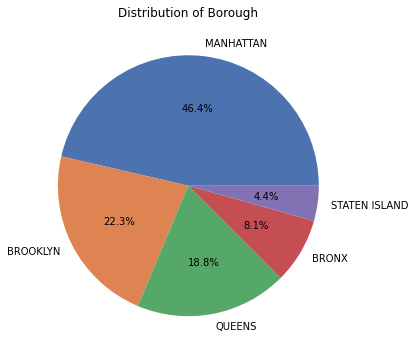

In [21]:
# Generate a color palette using seaborn
palette = sns.color_palette("deep", n_colors=len(data['BOROUGH'].unique()))

# Create a pie chart for the 'BOROUGH' column
plt.figure(figsize=(10, 6))
data['BOROUGH'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=palette)
plt.title('Distribution of Borough')
plt.ylabel('')  
plt.show()

In [22]:
# pip install squarify matplotlib

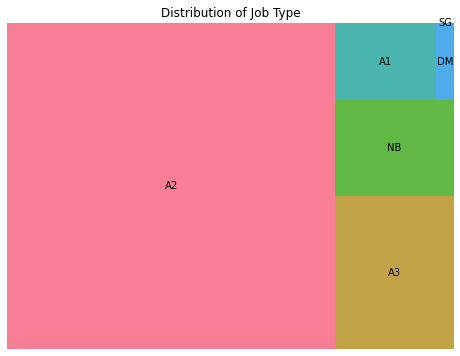

In [23]:
# Get the counts for 'Job Type'
job_type_counts = data['Job Type'].value_counts()
colors = sns.color_palette('husl', n_colors=len(job_type_counts))

# Create the treemap
plt.figure(figsize=(8, 6))
squarify.plot(sizes=job_type_counts, label=job_type_counts.index, alpha=0.9, color=colors)
plt.axis('off')
plt.title('Distribution of Job Type')

# Show the plot
plt.show()

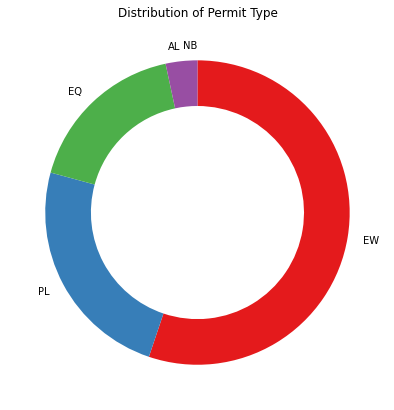

In [24]:
permit_type_counts = data['Permit Type'].value_counts()
palette = sns.color_palette("Set1", n_colors=len(permit_type_counts.index))

# Create the doughnut plot with the custom color palette
plt.figure(figsize=(10, 7))
plt.pie(permit_type_counts, labels = permit_type_counts.index, startangle = 90, counterclock = False, wedgeprops = dict(width = 0.3), colors=palette)
plt.title('Distribution of Permit Type')
plt.show()

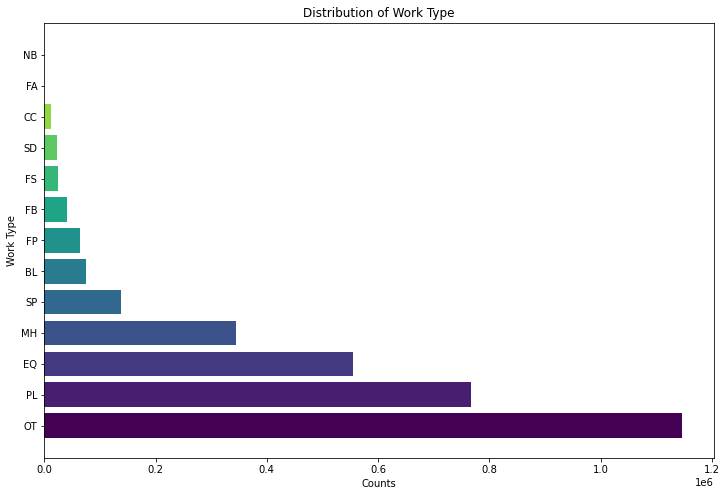

In [25]:
# Get the counts for each unique category in the 'Work Type' column
work_type_counts = data['Work Type'].value_counts()

# Generate a list of unique colors
colors = plt.cm.viridis(np.linspace(0, 1, len(work_type_counts)))

# Create the bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(work_type_counts.index, work_type_counts, color=colors)

# Add labels and title
plt.xlabel('Counts')
plt.ylabel('Work Type')
plt.title('Distribution of Work Type')

# Show the bar graph
plt.show()

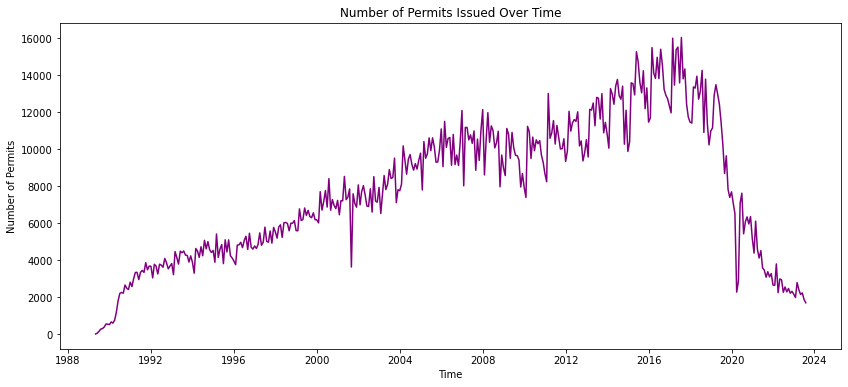

In [26]:
# Convert 'Issuance Date' to datetime type
data['Issuance Date'] = pd.to_datetime(data['Issuance Date'])

# Create a new DataFrame with the count of permits issued each month
time_series_data = data.groupby(data['Issuance Date'].dt.to_period("M")).size()

# Convert the PeriodIndex to datetime
time_series_data.index = time_series_data.index.to_timestamp()

# Plotting
plt.figure(figsize=(14,6))
plt.plot(time_series_data.index, time_series_data.values, color='purple') 
plt.title('Number of Permits Issued Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Permits')
plt.show()

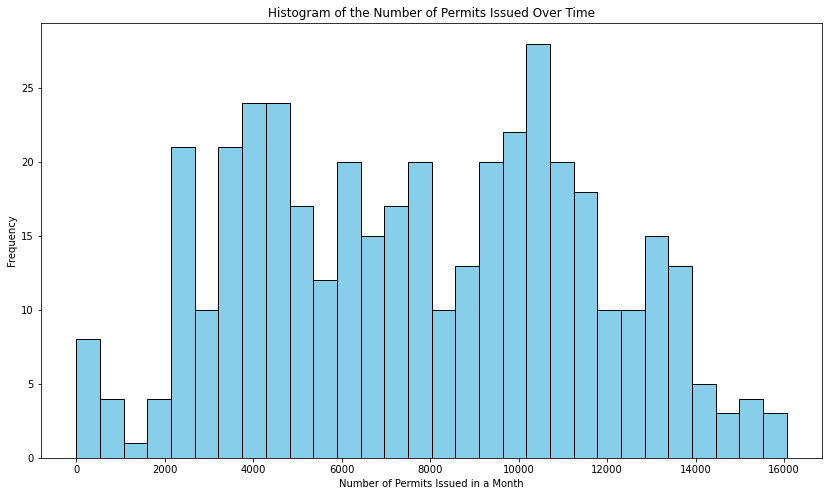

In [27]:
# Group by Issuance Date and aggregate
time_series_data = data.groupby(data['Issuance Date'].dt.to_period("M")).size()

# Convert the PeriodIndex to datetime
time_series_data.index = time_series_data.index.to_timestamp()

# Plotting the histogram
plt.figure(figsize=(14, 8))
plt.hist(time_series_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of the Number of Permits Issued Over Time')
plt.xlabel('Number of Permits Issued in a Month')
plt.ylabel('Frequency')
plt.show()

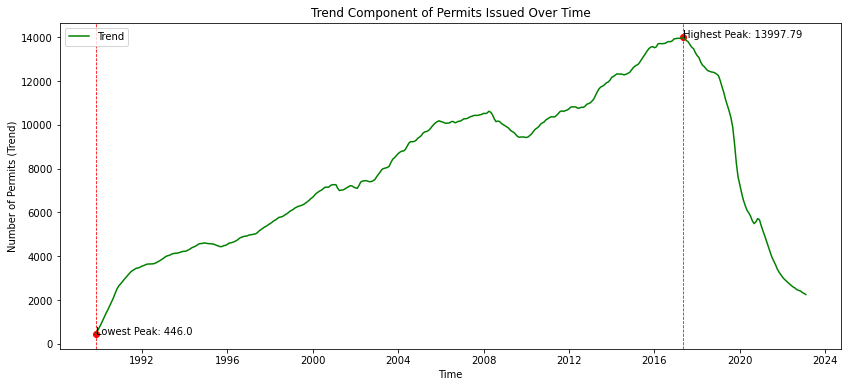

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Group by Issuance Date and aggregate
time_series_data = data.groupby(data['Issuance Date'].dt.to_period("M")).size()

# Convert the PeriodIndex to datetime
time_series_data.index = time_series_data.index.to_timestamp()

# Seasonal Decomposition to get the trend, seasonality, and residuals
decomposition = seasonal_decompose(time_series_data, period=12)
trend = decomposition.trend.dropna()

# Plotting Trend Component
plt.figure(figsize=(14, 6))
plt.plot(trend.index, trend.values, label='Trend', color='green')

# Annotate Highest and Lowest Points
highest_point = trend.idxmax()
lowest_point = trend.idxmin()

highest_value = round(trend[highest_point], 2)  # Rounding to 2 decimal places
lowest_value = round(trend[lowest_point], 2) 

plt.axvline(highest_point, color='red', linestyle='--', linewidth=0.8)
plt.axvline(lowest_point, color='red', linestyle='--', linewidth=0.8)

plt.scatter([highest_point, lowest_point], [highest_value, lowest_value], color='red')
plt.text(highest_point, highest_value, f'Highest Peak: {highest_value}')
plt.text(lowest_point, lowest_value, f'Lowest Peak: {lowest_value}')

plt.title('Trend Component of Permits Issued Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Permits (Trend)')
plt.legend(loc='upper left')
plt.show()

## Geospatial Data Analysis

Data Source: https://data.cityofnewyork.us/City-Government/2020-Census-Tracts-Tabular/63ge-mke6

2020 Census Tracts from the US Census for New York City

In [29]:
gdf_census = gpd.read_file('/Users/Sharvari/Downloads/WXY/2020 Census Tracts - Tabular/census_file.shp')

In [30]:
gdf_census.columns

Index(['ctlabel', 'borocode', 'boroname', 'ct2020', 'boroct2020', 'cdeligibil',
       'ntaname', 'nta2020', 'cdta2020', 'cdtaname', 'geoid', 'shape_leng',
       'shape_area', 'geometry'],
      dtype='object')

In [31]:
gdf_permits = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.LONGITUDE, data.LATITUDE))

In [32]:
print("CRS of census data:", gdf_census.crs)
print("CRS of permits data:", gdf_permits.crs)

CRS of census data: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
CRS of permits data: None


In [33]:
gdf_permits = gdf_permits.set_crs(gdf_census.crs)

In [34]:
# Perform the spatial join
joined_gdf = gpd.sjoin(gdf_permits, gdf_census, how="inner", op='within')

In [35]:
# Calculate the summary counts based on the joined data
permit_count_by_tract = joined_gdf['geoid'].value_counts()

In [36]:
# Group by 'geoid' and perform aggregation on all other numeric columns
summary_stats = joined_gdf.groupby('geoid').agg(['mean', 'std', 'min', 'max', 'count'])
summary_stats.reset_index(inplace=True)

borough_info = gdf_census[['geoid', 'boroname']].drop_duplicates()

# Join with the aggregated stats
final_summary_table = summary_stats.merge(borough_info, on='geoid', how='left')
final_summary_table.rename(columns={'boroname': 'Borough'}, inplace=True)

final_summary_table

,geoid,"(geoid, )","(Bin #, mean)","(Bin #, std)","(Bin #, min)","(Bin #, max)","(Bin #, count)","(Zip Code, mean)","(Zip Code, std)","(Zip Code, min)",...,"(shape_leng, std)","(shape_leng, min)","(shape_leng, max)","(shape_leng, count)","(shape_area, mean)","(shape_area, std)","(shape_area, min)","(shape_area, max)","(shape_area, count)",Borough
0,36005000100,36005000100,2.123646e+06,143303.723491,2096863,4014160,2012,11370.000000,0.000000,11370.0,...,0.0,18897.487749,18897.487749,2012,1.816373e+07,0.0,1.816373e+07,1.816373e+07,2012,Bronx
1,36005000200,36005000200,2.069126e+06,44293.556516,2019842,2128764,796,10473.000000,0.000000,10473.0,...,0.0,15251.735414,15251.735414,796,4.877013e+06,0.0,4.877013e+06,4.877013e+06,796,Bronx
2,36005000400,36005000400,2.111346e+06,81651.716446,2019917,2832940,2329,10472.987978,0.289910,10466.0,...,0.0,24785.525725,24785.525725,2329,8.557953e+06,0.0,8.557953e+06,8.557953e+06,2329,Bronx
3,36005001600,36005001600,2.064344e+06,57248.843913,2021445,2826530,1062,10473.000000,0.000000,10473.0,...,0.0,9671.306267,9671.306267,1062,5.221330e+06,0.0,5.221330e+06,5.221330e+06,1062,Bronx
4,36005001901,36005001901,2.070476e+06,72390.015495,2000009,2815279,776,10454.000000,0.000000,10454.0,...,0.0,6151.012561,6151.012561,776,2.232574e+06,0.0,2.232574e+06,2.232574e+06,776,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,36085030301,36085030301,5.095819e+06,92339.538031,5029207,5842343,590,10312.023729,4.226537,10303.0,...,0.0,18471.952663,18471.952663,590,7.766660e+06,0.0,7.766660e+06,7.766660e+06,590,Staten Island
2306,36085030302,36085030302,5.105072e+06,66492.477481,5032730,5863297,1091,10304.062328,3.246701,10303.0,...,0.0,13923.141306,13923.141306,1091,9.788181e+06,0.0,9.788181e+06,9.788181e+06,1091,Staten Island
2307,36085031901,36085031901,5.115217e+06,46212.859198,5028088,5817916,630,10303.000000,0.000000,10303.0,...,0.0,8255.026915,8255.026915,630,4.126596e+06,0.0,4.126596e+06,4.126596e+06,630,Staten Island
2308,36085031902,36085031902,5.135603e+06,142535.893991,5027380,5863399,1043,10303.000000,0.000000,10303.0,...,0.0,18067.518620,18067.518620,1043,7.019455e+06,0.0,7.019455e+06,7.019455e+06,1043,Staten Island


In [37]:
# Export DataFrame to Excel
final_summary_table.to_excel("/Users/Sharvari/Downloads/WXY/final_summary_table.xlsx", index=False)

In [38]:
joined_gdf.head()

,BOROUGH,Bin #,House #,Street Name,Job Type,Block,Lot,Community Board,Zip Code,Bldg Type,...,ct2020,boroct2020,cdeligibil,ntaname,nta2020,cdta2020,cdtaname,geoid,shape_leng,shape_area
0,MANHATTAN,1088749,1,MADISON AVE,A3,853.0,2.0,105,10010.0,2.0,...,005600,1005600,None,Midtown South-Flatiron-Union Square,MN0501,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Approximation),36061005600,5723.840529,1.878253e+06
83,MANHATTAN,1016895,4,EAST 28TH STREET,A2,857.0,75.0,105,10016.0,2.0,...,005600,1005600,None,Midtown South-Flatiron-Union Square,MN0501,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Approximation),36061005600,5723.840529,1.878253e+06
85,MANHATTAN,1016895,4,EAST 28TH STREET,A2,857.0,75.0,105,10016.0,2.0,...,005600,1005600,None,Midtown South-Flatiron-Union Square,MN0501,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Approximation),36061005600,5723.840529,1.878253e+06
88,MANHATTAN,1016895,4,EAST 28TH STREET,A2,857.0,75.0,105,10016.0,2.0,...,005600,1005600,None,Midtown South-Flatiron-Union Square,MN0501,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Approximation),36061005600,5723.840529,1.878253e+06
92,MANHATTAN,1016895,4,EAST 28TH STREET,A2,857.0,75.0,105,10016.0,2.0,...,005600,1005600,None,Midtown South-Flatiron-Union Square,MN0501,MN05,MN05 Midtown-Flatiron-Union Square (CD 5 Approximation),36061005600,5723.840529,1.878253e+06


In [39]:
joined_gdf.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job Type', 'Block',
       'Lot', 'Community Board', 'Zip Code', 'Bldg Type', 'Work Type',
       'Permit Status', 'Filing Status', 'Permit Type', 'Permit Sequence #',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'DOBRunDate', 'LATITUDE', 'LONGITUDE', 'COUNCIL_DISTRICT',
       'CENSUS_TRACT', 'NTA_NAME', 'geometry', 'index_right', 'ctlabel',
       'borocode', 'boroname', 'ct2020', 'boroct2020', 'cdeligibil', 'ntaname',
       'nta2020', 'cdta2020', 'cdtaname', 'geoid', 'shape_leng', 'shape_area'],
      dtype='object')

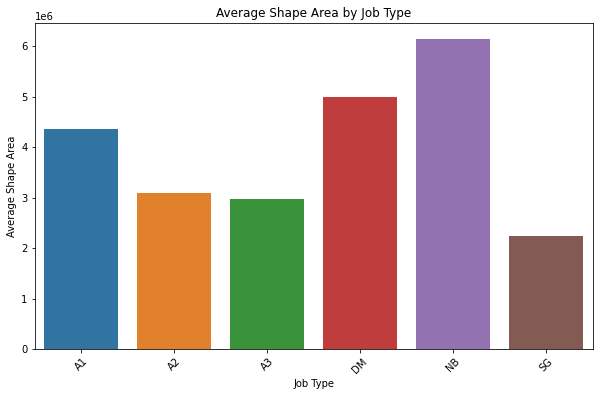

In [40]:
# Calculate the average shape area for each job type
avg_shape_area_by_job_type = joined_gdf.groupby('Job Type')['shape_area'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_shape_area_by_job_type.index, y=avg_shape_area_by_job_type.values)
plt.title('Average Shape Area by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Shape Area')
plt.xticks(rotation=45)
plt.show()

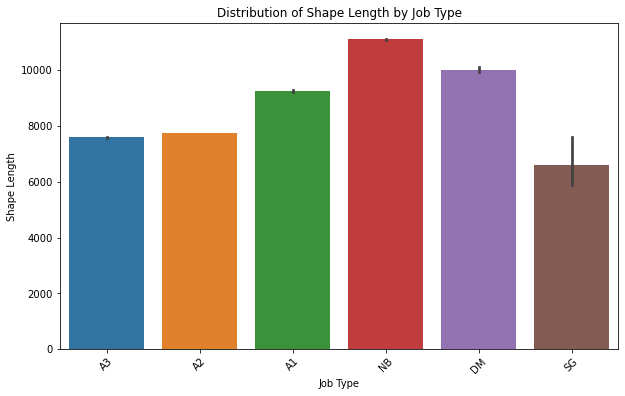

In [41]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.barplot(data=joined_gdf, x='Job Type', y='shape_leng')
plt.title('Distribution of Shape Length by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Shape Length')
plt.xticks(rotation=45)
plt.show()

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the census shapefile and permits data as GeoDataFrames
gdf_census = gpd.read_file('/Users/Sharvari/Downloads/WXY/2020 Census Tracts - Tabular/census_file.shp')
gdf_permits = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.LONGITUDE, data.LATITUDE))

# Set the CRS of permits data to match census data
gdf_permits = gdf_permits.set_crs(gdf_census.crs)

# Perform the spatial join
joined_gdf = gpd.sjoin(gdf_permits, gdf_census, how="inner", op='within')

# Calculate permit counts per census tract
permit_counts = joined_gdf.groupby('geoid')['geoid'].count()

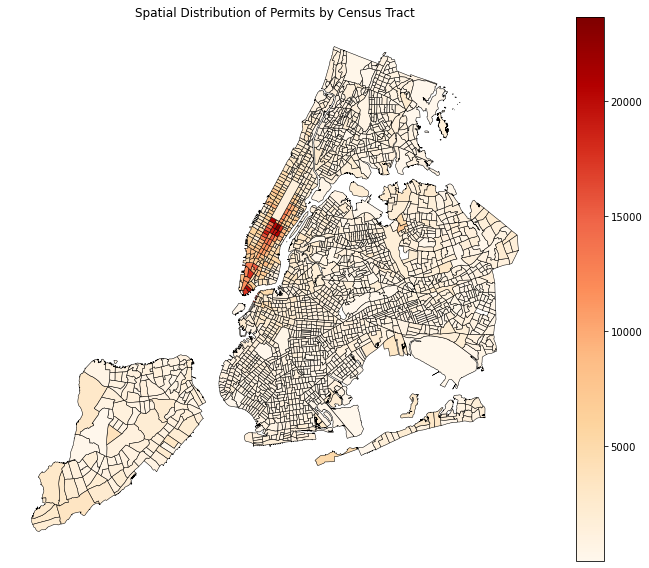

In [57]:
# Calculate permit counts per census tract
permit_counts = joined_gdf.groupby('geoid')['geoid'].count()

# Merge permit counts with census data
gdf_census = gdf_census.merge(permit_counts, left_on='geoid', right_index=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_census.plot(column='geoid_y', ax=ax, legend=True, cmap='OrRd', edgecolor='k', linewidth=0.5)
ax.set_title('Spatial Distribution of Permits by Census Tract')
ax.set_axis_off()
plt.show()